# Maskless cosmoSLICS for stageIV

In [5]:
# make function to open fits files and print the header
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import os
import fitsio
from lenspack.utils import bin2d
from lenspack.geometry.projections.gnom import radec2xy

In [122]:
SIZE_X_DEG = 10.
SIZE_Y_DEG = 10.
PIX_ARCMIN = 0.5

In [99]:
# Open the FITS file
with fitsio.FITS('/feynman/home/dap/lcs/work/lcs/share/at/cosmoSLICS/00_a/cosmoSLICS/01_a/GalCatalog_LOS_cone1.fits') as f:
    # Read the binary table from the second HDU (index 1)
    table_data = f[1].read()

# Now, table_data is a structured array with named columns.
# You can access each column by its name:
x_arcmin = table_data['x_arcmin']
y_arcmin = table_data['y_arcmin']
z_true   = table_data['z_true']
shear1   = table_data['shear1']
shear2   = table_data['shear2']
kappa    = table_data['kappa']

## Full $n(z)$

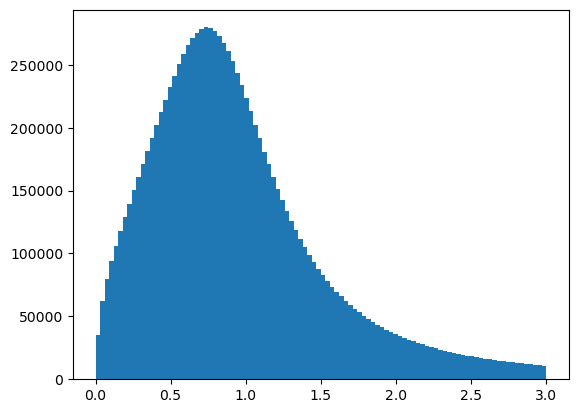

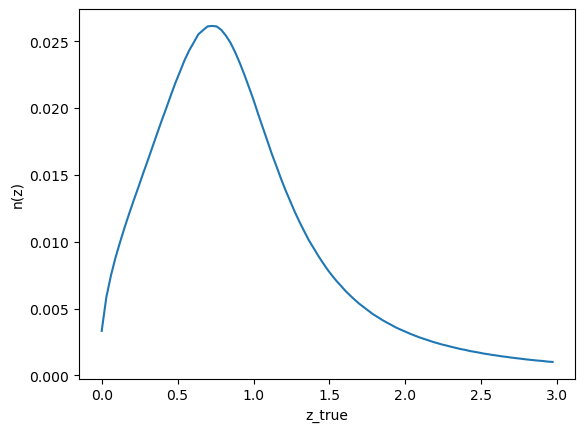

In [100]:
# make a histogram of z_true
plt.hist(z_true, bins=100)
plt.show()

# make an n(z) out of z_true
z_bins = np.linspace(0, 3, 100)
nz, _ = np.histogram(z_true, bins=z_bins)
# normalize the histogram
nz = nz / np.sum(nz)
# plot the histogram
plt.plot(z_bins[:-1], nz)
plt.xlabel('z_true')
plt.ylabel('n(z)')
plt.show()


In [102]:
# x,y = radec2xy(np.mean(x_arcmin), np.mean(y_arcmin), x_arcmin, y_arcmin)
# x,y = x*60*180/np.pi, y*60*180/np.pi
x = x_arcmin 
y = y_arcmin
Nx, Ny = int(SIZE_X_DEG/PIX_ARCMIN * 60), int(SIZE_Y_DEG/PIX_ARCMIN * 60)
galmap = bin2d(x, y, npix=(Nx, Ny))

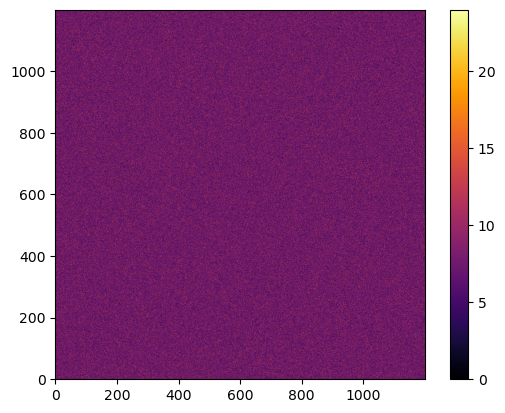

In [105]:
plt.imshow(galmap, origin='lower', cmap='inferno')
plt.colorbar()

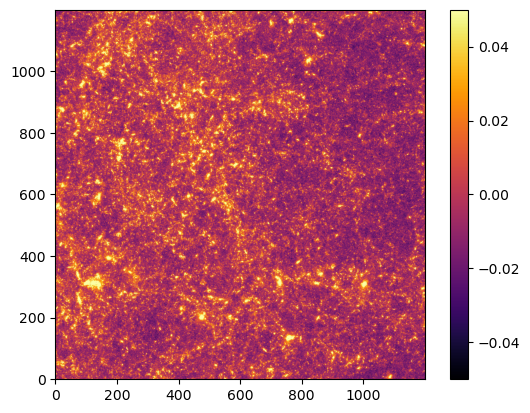

In [106]:
kappa_sim_map = bin2d(x, y, v=kappa, npix=(Nx, Ny))
plt.imshow(kappa_sim_map, origin='lower', cmap='inferno', vmin=-0.05, vmax=0.05)
plt.colorbar()

## Split $n(z)$ into bins

In [107]:
# Define the redshift bin edges (note: the last bin is defined as [lower, upper))
bin_edges = [0.0, 0.4676, 0.7194, 0.9625, 1.3319, 3.0]
# The provided mean redshifts (for reference or later use)
mean_redshifts = [0.286, 0.600, 0.841, 1.134, 1.852]

# Create a dictionary to hold the catalog for each bin
catalog_bins = {}

for i in range(len(bin_edges)-1):
    lower = bin_edges[i]
    upper = bin_edges[i+1]
    # Create a boolean mask for galaxies in the current redshift bin.
    # The upper edge is non-inclusive to avoid overlap.
    mask = (z_true >= lower) & (z_true < upper)
    catalog_bins[i] = table_data[mask]
    
    print(f"Bin {i+1}: z in [{lower}, {upper}) contains {len(catalog_bins[i])} galaxies, mean z ~ {mean_redshifts[i]}")


Bin 1: z in [0.0, 0.4676) contains 2160818 galaxies, mean z ~ 0.286
Bin 2: z in [0.4676, 0.7194) contains 2160359 galaxies, mean z ~ 0.6
Bin 3: z in [0.7194, 0.9625) contains 2160046 galaxies, mean z ~ 0.841
Bin 4: z in [0.9625, 1.3319) contains 2159249 galaxies, mean z ~ 1.134
Bin 5: z in [1.3319, 3.0) contains 2159518 galaxies, mean z ~ 1.852


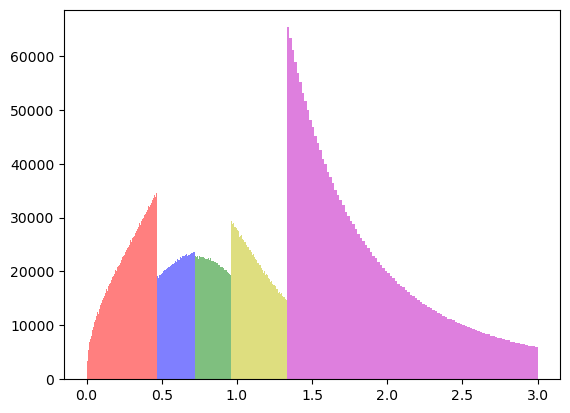

Text(0.5, 0, 'z_true')

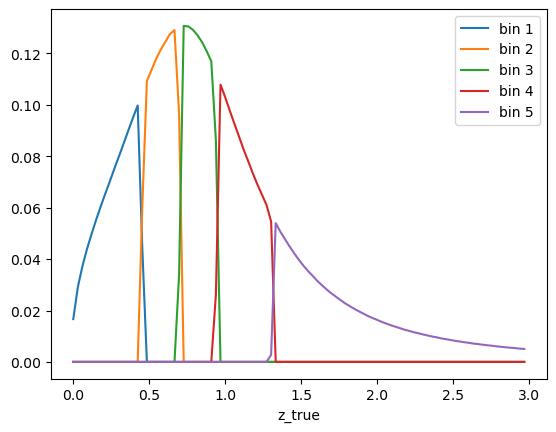

In [118]:
# make a histogram of z_true
plt.hist(catalog_bins[0]['z_true'], bins=100, color='r', alpha=0.5)
plt.hist(catalog_bins[1]['z_true'], bins=100, color='b', alpha=0.5)
plt.hist(catalog_bins[2]['z_true'], bins=100, color='g', alpha=0.5)
plt.hist(catalog_bins[3]['z_true'], bins=100, color='y', alpha=0.5)
plt.hist(catalog_bins[4]['z_true'], bins=100, color='m', alpha=0.5)
plt.show()

# make an n(z) out of z_true
z_bins = np.linspace(0, 3, 100)
for i in range(len(bin_edges)-1):
    nz, _ = np.histogram(catalog_bins[i]['z_true'], bins=z_bins)
    # normalize the histogram
    nz = nz / np.sum(nz)
    # plot the histogram
    plt.plot(z_bins[:-1], nz, label=f'bin {i+1}')
plt.legend()    
plt.xlabel('z_true')


## Bin 1 analysis

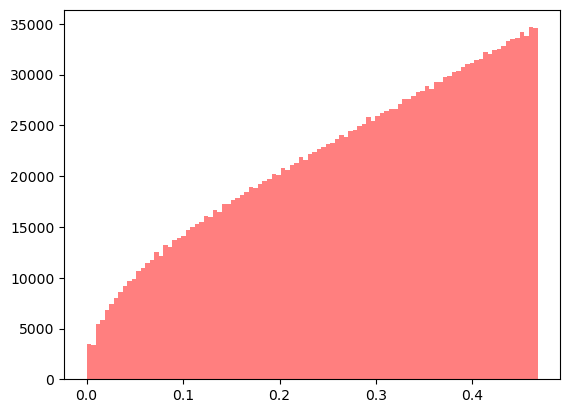

Text(0.5, 0, 'z_true')

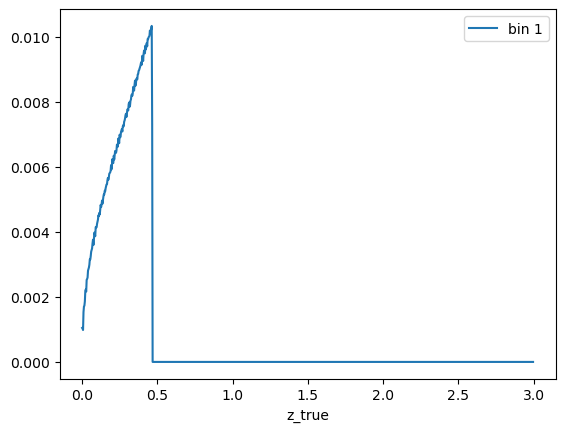

In [121]:
# make a histogram of z_true
plt.hist(catalog_bins[0]['z_true'], bins=100, color='r', alpha=0.5)
plt.show()
# make an n(z) out of z_true
z_bins = np.linspace(0, 3, 1000)
nz, _ = np.histogram(catalog_bins[0]['z_true'], bins=z_bins)
# normalize the histogram
nz = nz / np.sum(nz)
# plot the histogram
plt.plot(z_bins[:-1], nz, label='bin 1')
plt.legend()
plt.xlabel('z_true')


In [123]:
x = catalog_bins[0]['x_arcmin']
y = catalog_bins[0]['y_arcmin']
kappa = catalog_bins[0]['kappa']
Nx, Ny = int(SIZE_X_DEG/PIX_ARCMIN * 60), int(SIZE_Y_DEG/PIX_ARCMIN * 60)
kappa_sim_map = bin2d(x, y, v=kappa, npix=(Nx, Ny))

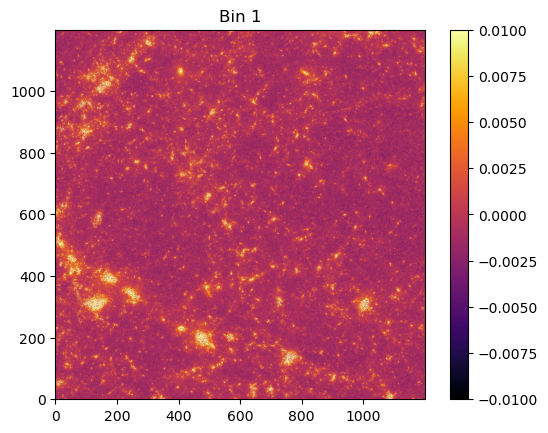

In [126]:
plt.imshow(kappa_sim_map, origin='lower', cmap='inferno', vmin=-0.01, vmax=0.01)
plt.title('Bin 1')
plt.colorbar()

## Analyze each bin

In [139]:
# make n(z) for each bin and save them in variables
z_bins = np.linspace(0, 3, 1001)
nzs = []
for i in range(len(bin_edges)-1):
    nz, _ = np.histogram(catalog_bins[i]['z_true'], bins=z_bins)
    # normalize the histogram
    nz = nz / np.sum(nz)
    nzs.append(nz)
    

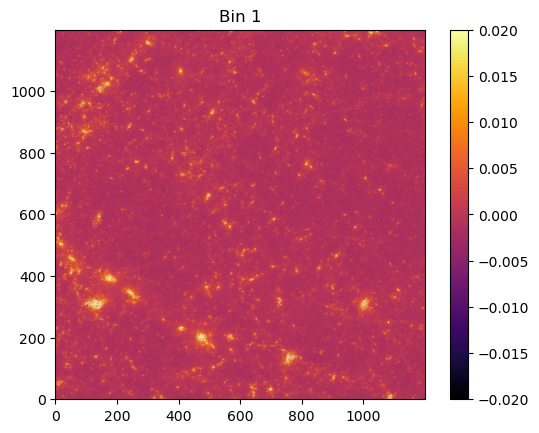

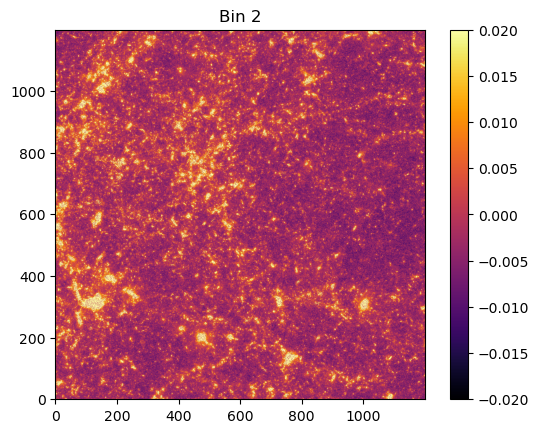

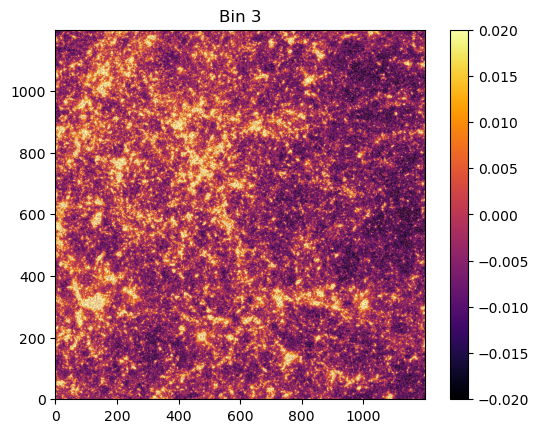

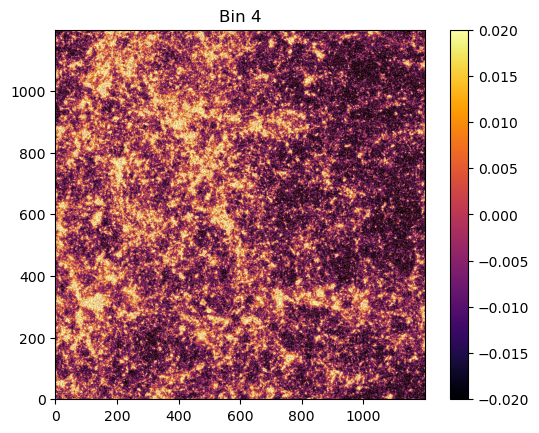

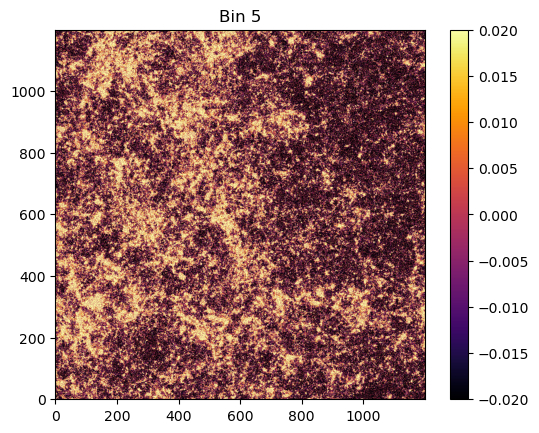

In [ ]:
for i in range(len(bin_edges)-1):
    x = catalog_bins[i]['x_arcmin']
    y = catalog_bins[i]['y_arcmin']
    kappa = catalog_bins[i]['kappa']
    Nx, Ny = int(SIZE_X_DEG/PIX_ARCMIN * 60), int(SIZE_Y_DEG/PIX_ARCMIN * 60)
    kappa_sim_map = bin2d(x, y, v=kappa, npix=(Nx, Ny))
    plt.imshow(kappa_sim_map, origin='lower', cmap='inferno', vmin=-0.02, vmax=0.02)
    plt.title(f'Bin {i+1}') 
    plt.colorbar()
    plt.show()

## BNT

In [142]:
import jax
import jax_cosmo as jc
import jax.numpy as jnp

print("JAX version:", jax.__version__)
print("jax-cosmo version:", jc.__version__)

JAX version: 0.4.35
jax-cosmo version: 0.1.0


In [145]:
# kde the n(z) for each bin
nzs_kde = []
for i in range(len(bin_edges)-1):
    nz = nzs[i]
    # KDE the n(z)
    kde = jc.redshift.kde_nz(z_bins[:-1], nz, bw=0.01)
    nzs_kde.append(kde)

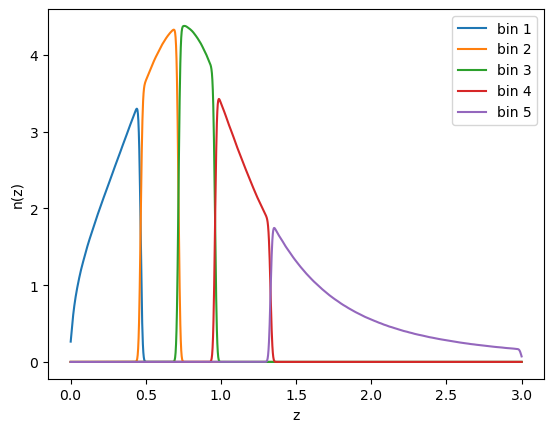

In [149]:
z = jnp.linspace(0.001, 3, 2000)
for i in range(len(bin_edges)-1):
    plt.plot(z, nzs_kde[i](z), label=f'bin {i+1}')
plt.legend()
plt.xlabel('z')
plt.ylabel('n(z)')
plt.show()

In [150]:
zmin = 0.001
zmax = 3.

In [155]:
import jax_cosmo.background as bkgrd
from jax_cosmo.scipy.integrate import simps
from functools import partial

@jax.jit
@partial(jax.vmap, in_axes=(None, None, 0))
def lensing_efficiency(cosmo, dndz, z):
  chi = bkgrd.radial_comoving_distance(cosmo, jc.utils.z2a(z))

  def integrand(z_prime):
    chi_prime = bkgrd.radial_comoving_distance(cosmo, jc.utils.z2a(z_prime))
    return (dndz(z_prime) * jnp.clip(chi_prime - chi, 0) / jnp.clip(chi_prime, 1.0))

  return simps(integrand, z, zmax, 256) * (1.0 + z) * chi

# Build cosmology object
cosmo = jc.Planck15()

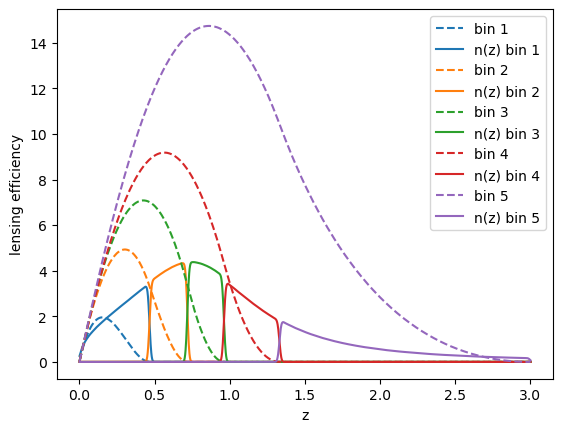

In [159]:
# plot the lensing efficiency for each bin and the n(z) for each bin
for i in range(len(bin_edges)-1):
    plt.plot(z, lensing_efficiency(cosmo, nzs_kde[i], z)/100, label=f'bin {i+1}', color=f'C{i}', linestyle='--')
    plt.plot(z, nzs_kde[i](z), label=f'n(z) bin {i+1}', color=f'C{i}')
plt.legend()
plt.xlabel('z')
plt.ylabel('lensing efficiency')
plt.show()

In [160]:
# Computing the BNT transform as implemented here: https://github.com/pltaylor16/x-cut/blob/master/BNT.py
import numpy as np

class BNT():

    def __init__(self, z, chi, n_i_list):

        self.z = z
        self.chi = chi
        self.n_i_list = n_i_list
        self.nbins = len(n_i_list)


    def get_matrix(self):

        A_list = []
        B_list = []
        for i in range(self.nbins):
            nz = self.n_i_list[i]
            A_list += [np.trapezoid(nz, self.z)]
            B_list += [np.trapezoid(nz / self.chi, self.z)]

        BNT_matrix = np.eye(self.nbins)
        BNT_matrix[1,0] = -1.

        for i in range(2,self.nbins):
            mat = np.array([ [A_list[i-1], A_list[i-2]], [B_list[i-1], B_list[i-2]] ])
            A = -1. * np.array( [A_list[i], B_list[i]] )
            soln = np.dot(np.linalg.inv(mat), A)
            BNT_matrix[i,i-1] = soln[0]
            BNT_matrix[i,i-2] = soln[1]

        return BNT_matrix

In [161]:
bnt = BNT(z, bkgrd.radial_comoving_distance(cosmo, jc.utils.z2a(z)), [nzs_kde[i](z) for i in range(len(bin_edges)-1)])
M = bnt.get_matrix()

/feynman/home/dap/lcs/at278006/.conda/envs/l1_norm/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)
/feynman/home/dap/lcs/at278006/.conda/envs/l1_norm/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device

In [162]:
# Looking at the resulting efficiency kernels
eff = np.zeros((5, len(z)))
for i in range(5):
    for j in range(5):
        eff[i] += M[i,j] * lensing_efficiency(cosmo, nzs_kde[j], z).squeeze()


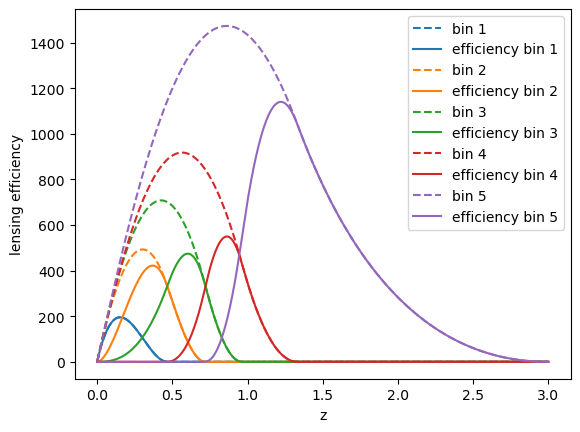

In [165]:
# plot the lensing efficiency for each bin and the n(z) for each bin
for i in range(len(bin_edges)-1):
    plt.plot(z, lensing_efficiency(cosmo, nzs_kde[i], z), label=f'bin {i+1}', color=f'C{i}', linestyle='--')
    plt.plot(z, eff[i,:], color=f'C{i}', label=f'efficiency bin {i+1}')
plt.legend()
plt.xlabel('z')
plt.ylabel('lensing efficiency')
plt.show()

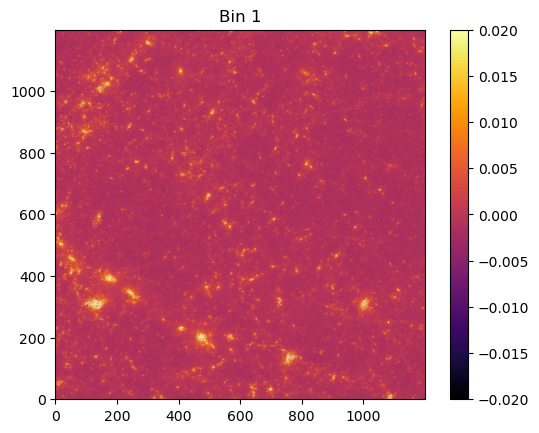

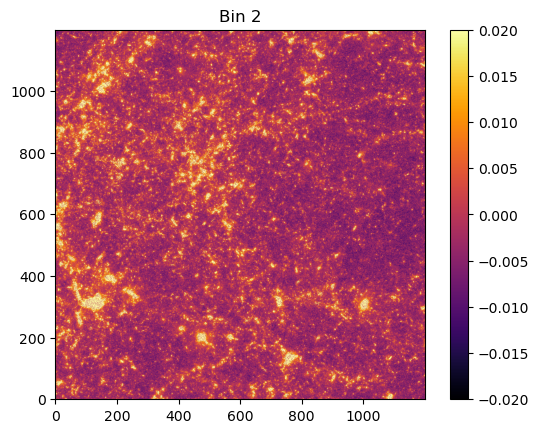

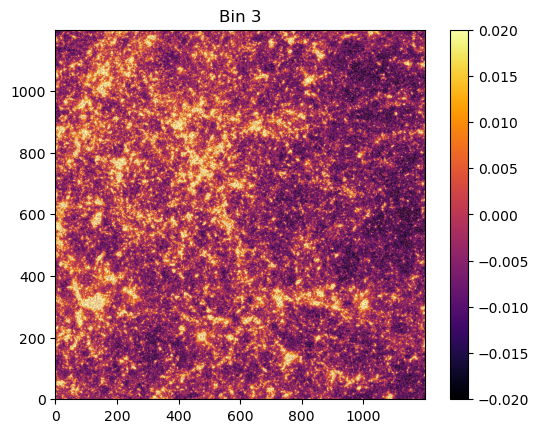

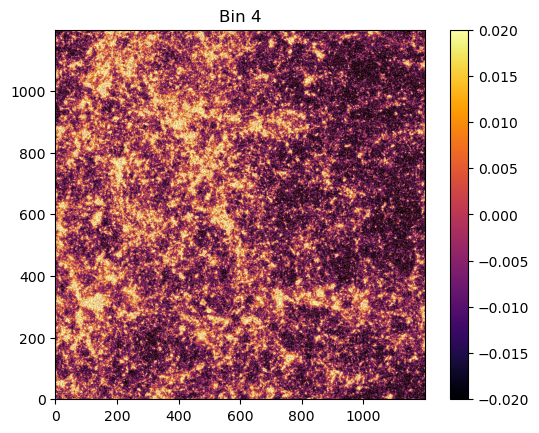

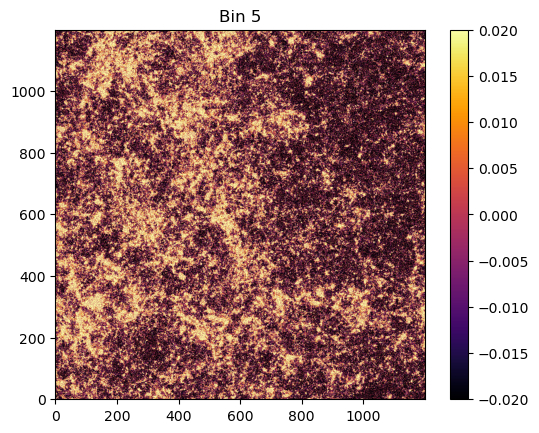

In [170]:
kappa_maps = []
for i in range(len(bin_edges)-1):
    x = catalog_bins[i]['x_arcmin']
    y = catalog_bins[i]['y_arcmin']
    kappa = catalog_bins[i]['kappa']
    Nx, Ny = int(SIZE_X_DEG/PIX_ARCMIN * 60), int(SIZE_Y_DEG/PIX_ARCMIN * 60)
    kappa_sim_map = bin2d(x, y, v=kappa, npix=(Nx, Ny))
    kappa_maps.append(kappa_sim_map)
    plt.imshow(kappa_sim_map, origin='lower', cmap='inferno', vmin=-0.02, vmax=0.02)
    plt.title(f'Bin {i+1}') 
    plt.colorbar()
    plt.show()
kappa_maps = np.array(kappa_maps)

In [172]:
kappa_maps.shape, M.shape

((5, 1200, 1200), (5, 5))

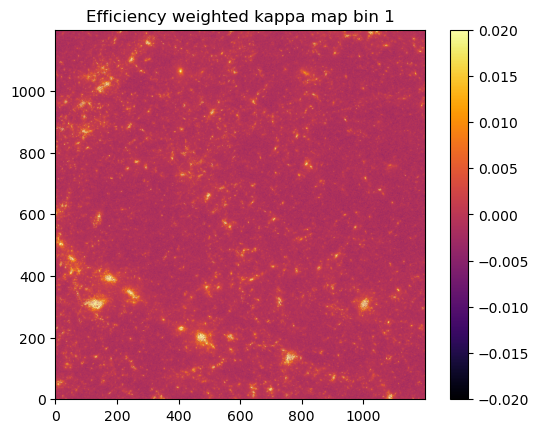

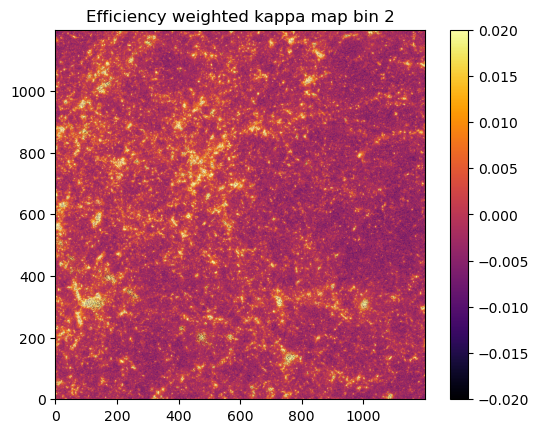

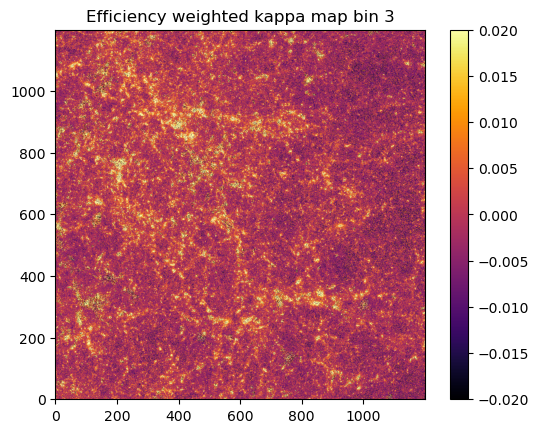

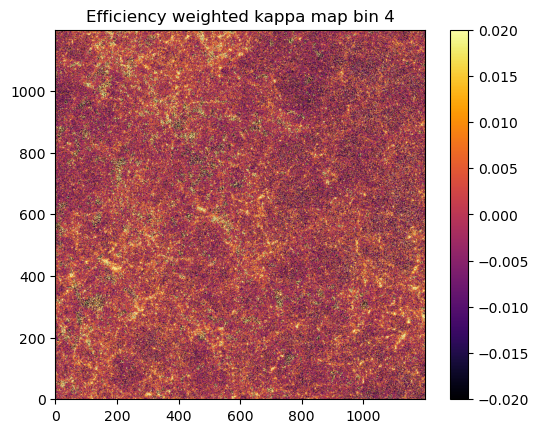

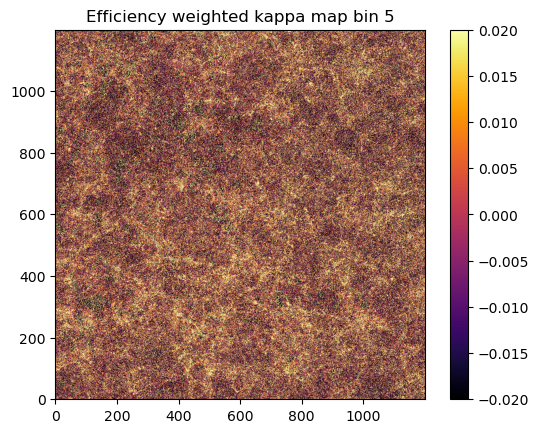

In [173]:
# Apply the BNT transform to the kappa maps
kappa_eff = np.zeros((5, Nx, Ny))
for i in range(5):
    for j in range(5):
        kappa_eff[i] += M[i,j] * kappa_maps[j]
        
for i in range(5):
    plt.imshow(kappa_eff[i], origin='lower', cmap='inferno', vmin=-0.02, vmax=0.02)
    plt.title(f'Efficiency weighted kappa map bin {i+1}') 
    plt.colorbar()
    plt.show()